In [2]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading dataset
df = pd.read_csv('data.csv')
df.shape

(18207, 89)

## 1- Find the Most Expensive Players whose contracts are going to Expire Soon

#### Lets check empty values, format and fill values for Release Clause column

In [4]:
def convert_release_clause(value):
    if pd.isnull(value):
        return np.nan
    value = value.replace('€', '')
    if 'K' in value:
        return float(value.replace('K', '')) * 1
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000
    return float(value)

# Apply the function to the 'release clause' column
df['Release Clause'] = df['Release Clause'].apply(convert_release_clause)

In [5]:
# Calculating the mean of non-NaN values
missing_values = df['Release Clause'].isna().sum()
print('Missing Values', missing_values)
mean_value = round(df['Release Clause'].dropna().mean(), 2)
print("Mean", mean_value)

# Filling NaN values with the calculated mean
df['Release Clause'] = df['Release Clause'].fillna(mean_value)
missing_values = df['Release Clause'].isna().sum()
print('Missing Values', missing_values)

Missing Values 1564
Mean 4585.06
Missing Values 0


In [6]:
missing_values = df['Contract Valid Until'].isna().sum()
missing_values

289

In [7]:
def extract_year(value):
    if pd.isna(value):
        return value
    if isinstance(value, str) and '-' in value:
        return value.split('-')[0]
    if isinstance(value, (int, float)):
        return str(int(value))  # Convert float/int to string
    return value

# Apply the function to extract the year
df['Contract Valid Until'] = df['Contract Valid Until'].apply(extract_year)

# Calculate the mode (most frequent year)
mode_value = df['Contract Valid Until'].mode()[0]

print('Mode', mode_value)

missing_values = df['Contract Valid Until'].isna().sum()

print('Missing Values', missing_values)

# Fill NaN values with the mode
df['Contract Valid Until'] = df['Contract Valid Until'].fillna(mode_value)

missing_values = df['Contract Valid Until'].isna().sum()
print('Missing Values', missing_values)



Mode 2019
Missing Values 289
Missing Values 0


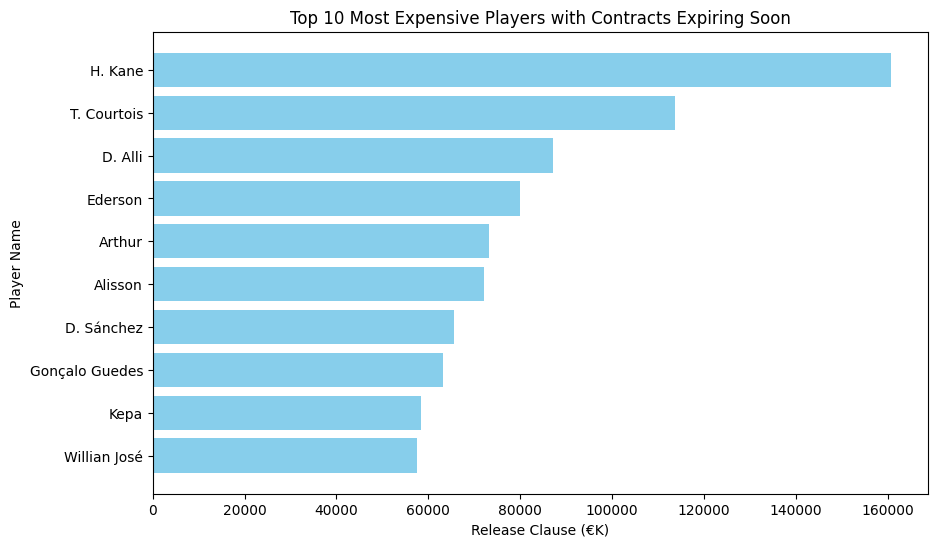

In [8]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'], errors='coerce').dt.year

# Filter players with contracts expiring this or next year
current_year = pd.Timestamp.now().year
expiring_soon = df[(df['Contract Valid Until'] <= current_year + 1) & (df['Contract Valid Until'] >= current_year)]

# Find the most expensive players
most_expensive_players = expiring_soon.nlargest(10, 'Release Clause')

# Plot the most expensive players whose contracts are expiring soon
plt.figure(figsize=(10, 6))
plt.barh(most_expensive_players['Name'], most_expensive_players['Release Clause'], color='skyblue')
plt.xlabel('Release Clause (€K)')
plt.ylabel('Player Name')
plt.title('Top 10 Most Expensive Players with Contracts Expiring Soon')
plt.gca().invert_yaxis()
plt.show()

### Compare Indian Footballers with Russian Footballers

In [9]:
missing_values = df['Nationality'].isna().sum()
missing_values

0

In [10]:
# Filter the dataset for Indian and Russian footballers
indian_footballers = df[df['Nationality'] == 'India']
russian_footballers = df[df['Nationality'] == 'Russia']

# Summary statistics for Indian footballers
indian_summary = indian_footballers.describe()

# Summary statistics for Russian footballers
russian_summary = russian_footballers.describe()

indian_summary, russian_summary


(         Unnamed: 0             ID        Age    Overall  Potential  \
 count     30.000000      30.000000  30.000000  30.000000  30.000000   
 mean   15262.133333  228652.966667  24.933333  58.666667  63.600000   
 std     2113.852224   13864.686438   3.741043   3.294021   4.140631   
 min     8605.000000  190939.000000  19.000000  53.000000  56.000000   
 25%    14339.750000  223763.250000  22.000000  56.250000  61.250000   
 50%    15859.500000  229830.000000  24.500000  58.000000  64.000000   
 75%    16729.500000  236693.500000  26.750000  60.750000  66.750000   
 max    17539.000000  245170.000000  33.000000  67.000000  71.000000   
 
            Special  International Reputation  Weak Foot  Skill Moves  \
 count    30.000000                      30.0  30.000000    30.000000   
 mean   1402.800000                       1.0   2.966667     1.900000   
 std     197.178966                       0.0   0.668675     0.402578   
 min     838.000000                       1.0   1.000000  

C:\Users\JoseAndresZacarias\AppData\Local\Temp\ipykernel_14804\1855827391.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([indian_footballers['Age'], russian_footballers['Age']], labels=['India', 'Russia'])
C:\Users\JoseAndresZacarias\AppData\Local\Temp\ipykernel_14804\1855827391.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([indian_footballers['Overall'], russian_footballers['Overall']], labels=['India', 'Russia'])
C:\Users\JoseAndresZacarias\AppData\Local\Temp\ipykernel_14804\1855827391.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([indian_footballers[

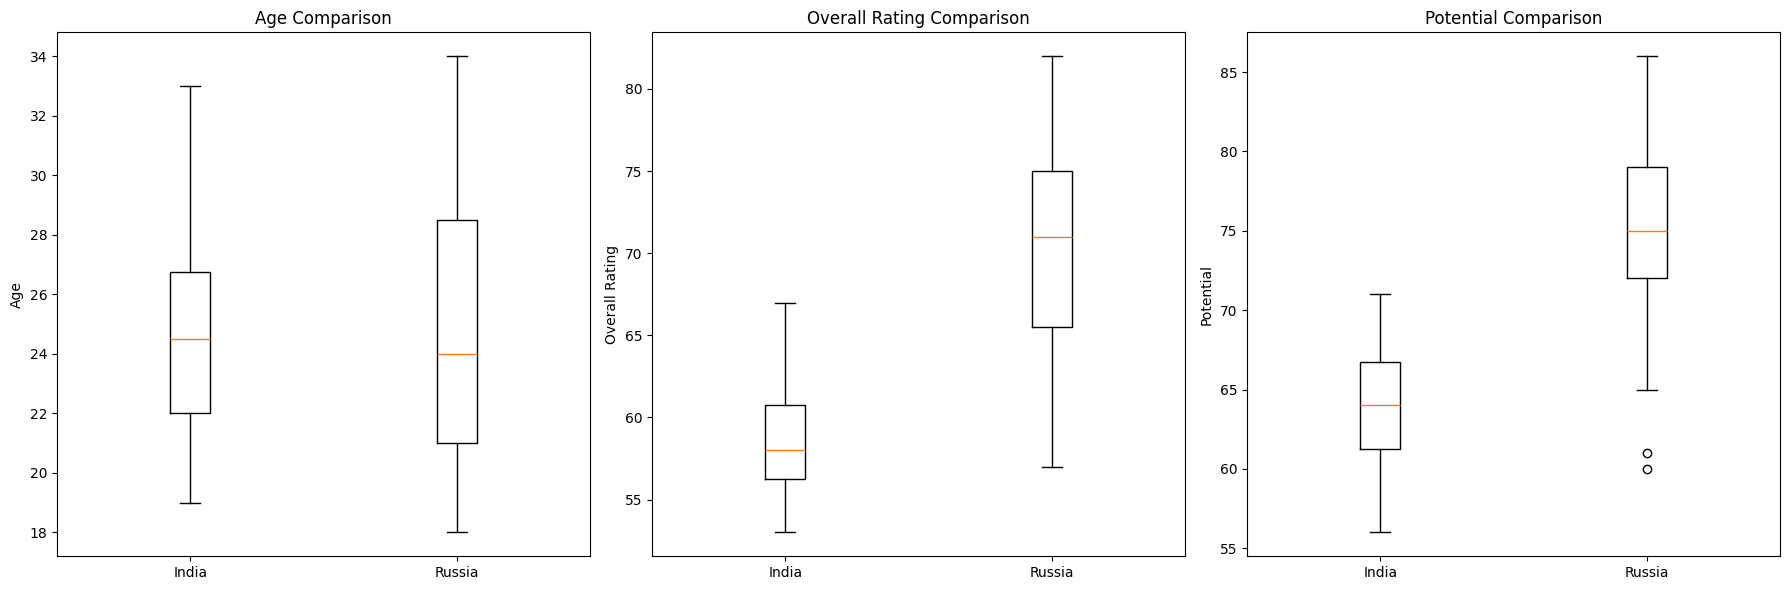

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age comparison
axes[0].boxplot([indian_footballers['Age'], russian_footballers['Age']], labels=['India', 'Russia'])
axes[0].set_title('Age Comparison')
axes[0].set_ylabel('Age')

# Overall Rating comparison
axes[1].boxplot([indian_footballers['Overall'], russian_footballers['Overall']], labels=['India', 'Russia'])
axes[1].set_title('Overall Rating Comparison')
axes[1].set_ylabel('Overall Rating')

# Potential comparison
axes[2].boxplot([indian_footballers['Potential'], russian_footballers['Potential']], labels=['India', 'Russia'])
axes[2].set_title('Potential Comparison')
axes[2].set_ylabel('Potential')

plt.tight_layout()
plt.show()

### Find the Most Popular Footballers under 20

In [12]:
# Filtering players under 20 years old
under_20_footballers = df[df['Age'] < 20]
top_10_popular_under_20 = under_20_footballers.sort_values(by='Overall', ascending=False).head(10)
top_10_popular_under_20[['Name', 'Age', 'Nationality', 'Overall', 'Potential']]


,Name,Age,Nationality,Overall,Potential
25,K. Mbappé,19,France,88,95
229,G. Donnarumma,19,Italy,82,93
226,M. de Ligt,18,Netherlands,82,91
413,K. Havertz,19,Germany,80,89
570,C. Pulisic,19,United States,79,87
730,A. Hakimi,19,Morocco,78,86
734,A. Lafont,19,France,78,90
735,T. Alexander-Arnold,19,England,78,88
1143,Vinícius Júnior,17,Brazil,77,92
1004,J. Sancho,18,England,77,89


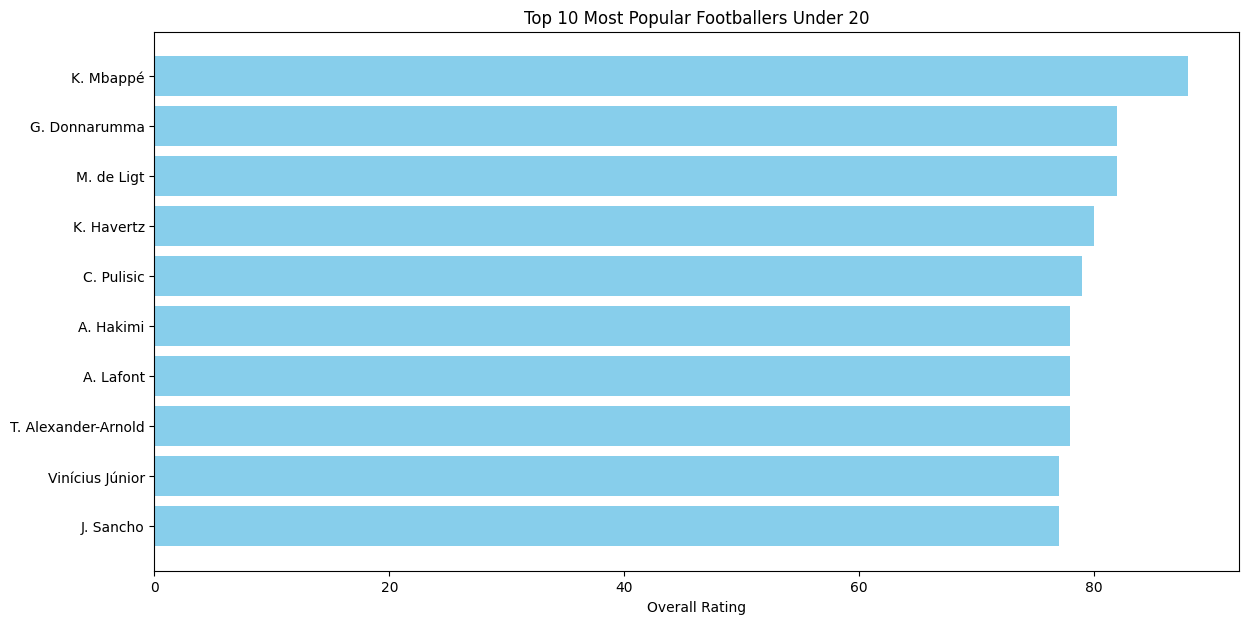

In [13]:
# Plotting a bars for the top 10 most popular footballers under 20
plt.figure(figsize=(14, 7))

# Bar plot
plt.barh(top_10_popular_under_20['Name'], top_10_popular_under_20['Overall'], color='skyblue')
plt.xlabel('Overall Rating')
plt.title('Top 10 Most Popular Footballers Under 20')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated on top

plt.show()